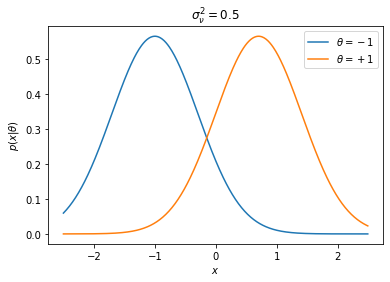

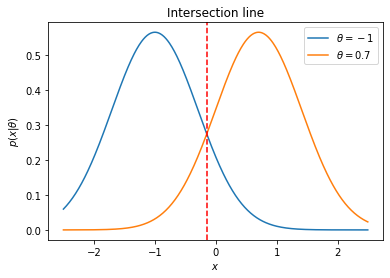

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import rcParams

sigma_nu = np.sqrt(1)
theta = np.random.choice([-1, 1])
nu = np.random.normal(0.0, sigma_nu)
x = theta + nu

def p_x_given_theta(x, theta, sigma_nu):
    return stats.norm.pdf(x, loc=theta, scale=sigma_nu) 

def p_x(x, sigma_nu):
    return 0.5*stats.norm.pdf(x,loc=-1,scale=sigma_nu) + 0.5*stats.norm.pdf(x,loc=1,scale=sigma_nu)

def p_theta_given_x(theta, x, sigma_nu):
    a = np.exp(-x / sigma_nu**2)
    b = np.exp(x / sigma_nu**2)
    if theta == -1:
        return a / (a+b)
    elif theta == 1:
        return b / (a+b)
    else:
        raise ValueError
        

x = np.arange(-2.5, 2.5, 0.01)
sigma = np.sqrt(.5)
plt.plot(x, p_x_given_theta(x, -1, sigma))
plt.plot(x, p_x_given_theta(x, 0.7, sigma))
plt.xlabel('$x$')
plt.ylabel(r'$p(x | \theta)$')
plt.title(r'$\sigma_\nu^2={}$'.format(np.round(sigma**2, 2)))
plt.legend([r'$\theta = -1$', r'$\theta = +1$'], loc='upper right')
plt.show()

n = np.where(abs(p_x_given_theta(x, -1, sigma) - p_x_given_theta(x, 0.7, sigma))<0.008)

plt.plot(x, p_x_given_theta(x, -1, sigma))
plt.plot(x, p_x_given_theta(x, 0.7, sigma))
plt.axvline(x[n], color="red", ls="--")

# show the result
plt.xlabel('$x$')
plt.ylabel(r'$p(x | \theta)$')
plt.title('Intersection line')
plt.legend([r'$\theta = -1$', r'$\theta = 0.7$'], loc='upper right')
plt.show()